In [1]:
import sys
sys.path.append("./utils")
sys.path.append("./model")
from utils import helper
import model_utils
import torch
import torchvision
import torch.nn as nn
from torchvision import transforms
import matplotlib.pyplot as plt
import torch.utils.data as data

helper.set_random_seed()
batch_size = 128 # batch_size = 128 for arXiv:1512.03385
print(dir(model_utils))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'json', 'load_model', 'os', 'save_model', 'test_model', 'torch', 'torchvision', 'train_model']


In [1]:
#get CIFAR10 dataset
train_dataset,test_dataset, MEAN, STD = helper.download_dataset("./cifar10_data","CIFAR10")
_train_dataset,_val_dataset = torch.utils.data.random_split(train_dataset,[0.9,0.1])
#transfomation
#in arXiv:1512.03385, CIFAR10 data section
aug_transforms = transforms.Compose([transforms.RandomHorizontalFlip(),
                                     transforms.RandomCrop(size=(32,32),padding=4),
                                     transforms.ToTensor(),
                                     transforms.Normalize(MEAN,STD)])
norm_transform = transforms.Compose([transforms.ToTensor(),
                                     transforms.Normalize(MEAN,STD)])

train_dataset = helper.WrappedDataset(_train_dataset,aug_transforms,n_views = 2)
val_dataset = helper.WrappedDataset(_val_dataset,norm_transform)
test_dataset = helper.WrappedDataset(test_dataset,norm_transform)

train_loader = data.DataLoader(train_dataset,batch_size = batch_size,shuffle=True)
val_loader = data.DataLoader(val_dataset,batch_size = batch_size,shuffle=True)
test_loader = data.DataLoader(test_dataset,batch_size = batch_size,shuffle=True)
# show the images after augumentaion
classes = helper.get_cifar10_classes()
imgs,labels = next(iter(train_loader))

img_list, label_list = [],[]
for i_view in range(2):
    for j_img in range(batch_size):
        img_list.append(imgs[i_view][j_img])
        label_list.append(classes[labels[i_view][j_img]])
helper.show_images(img_list,4,4,label_list)
                                    

NameError: name 'helper' is not defined

In [3]:
# get the model
net = torchvision.models.resnet18(num_classes = 10)
# define the loss function
loss_fn = torch.nn.CrossEntropyLoss()
# define the optimizer
sgd_optimizer = torch.optim.SGD(net.parameters(),lr=0.1,momentum=0.9,weight_decay=0.0001)
# get the device
device = helper.get_device()


In [4]:
# in the paper it is trained for around 160 epoches
with helper.Timer("Training"):
    accs = model_utils.train_model(net,sgd_optimizer,loss_fn,train_loader,test_loader,val_loader,
                n_epoch=50, n_converge = 10,device = device)
    torch.cuda.synchronize(device)

epoch=0,training accuracy is 0.274

epoch=1,training accuracy is 0.431

epoch=2,training accuracy is 0.518

epoch=3,training accuracy is 0.584

epoch=4,training accuracy is 0.636

epoch=5,training accuracy is 0.667

epoch=6,training accuracy is 0.690

epoch=7,training accuracy is 0.714

epoch=8,training accuracy is 0.731

epoch=9,training accuracy is 0.744

epoch=10,training accuracy is 0.759

epoch=11,training accuracy is 0.767

epoch=12,training accuracy is 0.771

epoch=13,training accuracy is 0.782

epoch=14,training accuracy is 0.793

epoch=15,training accuracy is 0.798

epoch=16,training accuracy is 0.805

epoch=17,training accuracy is 0.810

epoch=18,training accuracy is 0.814

epoch=19,training accuracy is 0.821

epoch=20,training accuracy is 0.825

epoch=21,training accuracy is 0.827

epoch=22,training accuracy is 0.834

epoch=23,training accuracy is 0.837

epoch=24,training accuracy is 0.839

epoch=25,training accuracy is 0.842

epoch=26,training accuracy is 0.848

epoch=27,tr

In [5]:
print(accs)

{'training_accs': [0.27416667342185974, 0.43058890104293823, 0.5180888772010803, 0.5839444398880005, 0.6358555555343628, 0.667033314704895, 0.6897000074386597, 0.7135444283485413, 0.7309666872024536, 0.7442777752876282, 0.7590555548667908, 0.7668111324310303, 0.7710666656494141, 0.7823889255523682, 0.7927666902542114, 0.7976444363594055, 0.8050000071525574, 0.8103222250938416, 0.814466655254364, 0.8213000297546387, 0.8250333666801453, 0.8271222114562988, 0.8339222073554993, 0.8374555706977844, 0.8391777873039246, 0.8422889113426208, 0.8482999801635742, 0.849922239780426, 0.8523111343383789, 0.8554666638374329, 0.8567000031471252, 0.8599889278411865, 0.8628333210945129, 0.8625444769859314, 0.8668110966682434, 0.8696222305297852, 0.8715111017227173, 0.8732666969299316, 0.8737666606903076, 0.875677764415741, 0.8778889179229736, 0.8790667057037354, 0.8797555565834045, 0.8811777830123901, 0.8822555541992188, 0.88227778673172, 0.8854889273643494, 0.8877222537994385, 0.8869333267211914, 0.889

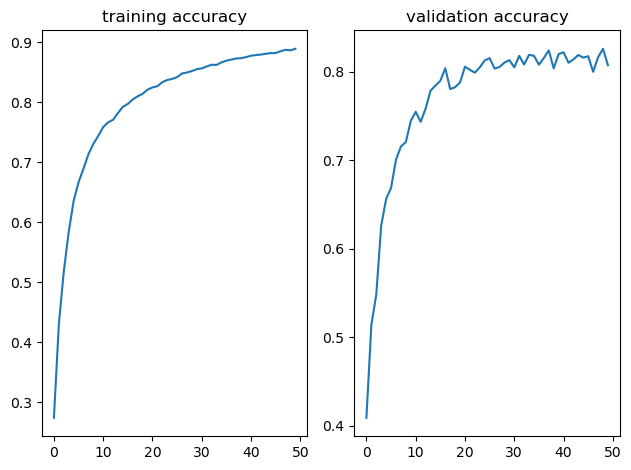

In [6]:
fig,axes = plt.subplots(1,2)
axes[0].set_title("training accuracy")
axes[0].plot(accs["training_accs"])
axes[1].set_title("validation accuracy")
axes[1].plot(accs["val_accs"])
fig.tight_layout()